In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [3]:
CNS_DF = pd.read_csv('censusincomeproject.csv')

In [11]:
CNS_DF.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
CNS_DF.shape

(32560, 15)

In [6]:
CNS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
CNS_DF.nunique()  #Checking unique element in each column

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
CNS_DF.isnull().sum()  #Checking null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In the dataset no null values, however some columns has "?" values which need to be treated as null values.

In [14]:
(CNS_DF==' ?').sum()   #Checking "?" values in each column

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Workclass  has 1836 "?" values.

Occupation has 1843 "?" values.

Native_country has 583 "?" values.

In [15]:
CNS_DF.replace({' ?':np.nan},inplace = True)  #converting "?" values to Nan values

In [16]:
CNS_DF.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [17]:
CNS_DF.isnull().sum()  #checking for null values

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [18]:
CNS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking for unique categories in the categorical columns with null values

In [19]:
CNS_DF.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

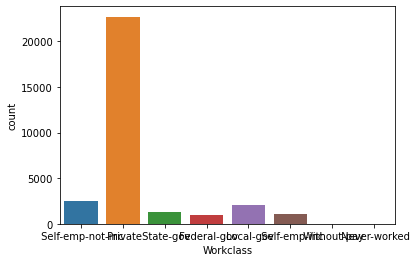

In [20]:
sns.countplot(CNS_DF.Workclass)

In [21]:
CNS_DF.Workclass.mode()

0     Private
dtype: object

In [23]:
CNS_DF.Workclass.isnull().sum()/32560*100  #Checking for null values in %

5.638820638820639

5.63% of Workclass data is NaN

In [24]:
#checking the % share of most frequently occuring value.

(CNS_DF['Workclass'] == ' Private').sum()/CNS_DF.Workclass.count()*100

73.87058976695742

73.87% of Workclass data is "Private"

There for imputing 'Private' to NaN values in workclass column

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose=0)

In [27]:
si = si.fit(CNS_DF[['Workclass']])

In [28]:
CNS_DF[['Workclass']] = si.transform(CNS_DF[['Workclass']])

In [29]:
CNS_DF[['Workclass']].isnull().sum()

Workclass    0
dtype: int64

Now, there are no more null values in "Workclass" column.

In [30]:
CNS_DF.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

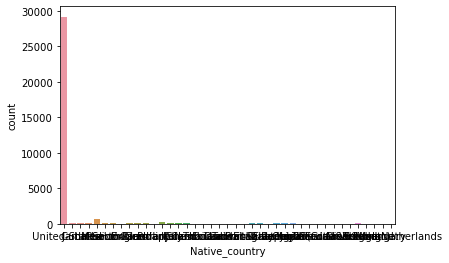

In [31]:
sns.countplot(CNS_DF.Native_country)

In [32]:
CNS_DF.Native_country.mode()  #The most frequently occuring value

0     United-States
dtype: object

In [33]:
CNS_DF.Native_country.isnull().sum()/32560*100  #Checking % of NaN values

1.7905405405405406

1.79% of Native_Country data is NaN

In [34]:
#Checking the % of share of most frequently occuring value

(CNS_DF['Native_country'] == ' United-States').sum()/CNS_DF.Native_country.count()*100 

91.21868843231073

91.21% of data is "United-States"

# So imputing "United-States" to NaN values in Native_country column

In [35]:
si = SimpleImputer(missing_values=np.nan,strategy= 'most_frequent',verbose=0)

In [36]:
si = si.fit(CNS_DF[['Native_country']])

In [37]:
CNS_DF[['Native_country']] = si.transform(CNS_DF[['Native_country']])

In [38]:
CNS_DF[['Native_country']].isnull().sum()

Native_country    0
dtype: int64

There are no more null values in "Native_country" column

In [39]:
CNS_DF.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

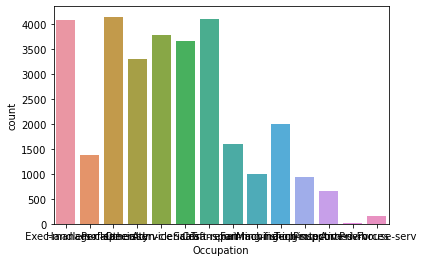

In [40]:
sns.countplot(CNS_DF.Occupation)

In [41]:
CNS_DF.Occupation.mode() #checking most frequently occuring value

0     Prof-specialty
dtype: object

In [43]:
CNS_DF.Occupation.isnull().sum()/32560*100 #checking % of NaN Values

5.66031941031941

5.66% of Occupation data is NaN

In [45]:
#Checking the % of share most frequently occuring value.

(CNS_DF['Occupation']==' Prof-specialty').sum()/CNS_DF.Occupation.count()*100

13.477878699091708

13.47% of Occupation data is "Prof-specialty".

In this case, it is better to drop all the respective rows which have "NaN" values under Occupation column

In [46]:
CNS_DF.isnull().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [47]:
CNS_DF.dropna(inplace=True)

In [48]:
CNS_DF.shape

(30717, 15)

In [50]:
CNS_DF.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [51]:
CNS_DF.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [52]:
CNS_DF

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Feature column data type indicates that feature data are a mix of continuous and categorical data, while target/label("Income") data type indicates that dependent variable data is categorical in nature.

# DataSet Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# The prediction task is to determine whether a person makes over  50K a year.

# Getting the basic summary and statistical information of the data.

In [54]:
CNS_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30717 non-null  int64 
 1   Workclass       30717 non-null  object
 2   Fnlwgt          30717 non-null  int64 
 3   Education       30717 non-null  object
 4   Education_num   30717 non-null  int64 
 5   Marital_status  30717 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    30717 non-null  object
 8   Race            30717 non-null  object
 9   Sex             30717 non-null  object
 10  Capital_gain    30717 non-null  int64 
 11  Capital_loss    30717 non-null  int64 
 12  Hours_per_week  30717 non-null  int64 
 13  Native_country  30717 non-null  object
 14  Income          30717 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
CNS_DF.dtypes[CNS_DF.dtypes=='object'] #Identifying the categorical columns

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [56]:
CNS_DF.dtypes[CNS_DF.dtypes !='object'] #Identifying continuous columns

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

In [57]:
CNS_DF.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30717.000000,3.071700e+04,30717.000000,30717.000000,30717.000000,30717.000000
mean,38.443565,1.898492e+05,10.130221,1106.002311,88.913110,40.949344
std,13.118441,1.054581e+05,2.562458,7497.982938,405.663489,11.985576
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean and 50% in continuous and discrete columns are similar indicating a somewhat normal distribution in Age column. A higher std in Capital_gain,Capital_loss and Fnlwgt indicate skewness in their respective data distribution.

In [58]:
CNS_DF.skew()

Age                0.531692
Fnlwgt             1.457202
Education_num     -0.310305
Capital_gain      11.785715
Capital_loss       4.514245
Hours_per_week     0.331806
dtype: float64

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

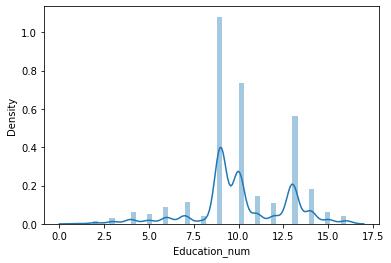

In [59]:
sns.distplot(CNS_DF.Education_num)

This is a Classification problem since the TArget/Label column (Income) has  categorical type of data.

Interpreting relationship between dependent and independent variables.

Analysing the target class

In [60]:
CNS_DF['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

# There are 2 unique categorical values in the label column/targe variable

In [61]:
CNS_DF['Income'].value_counts()

 <=50K    23067
 >50K      7650
Name: Income, dtype: int64

Class :

'<=50K' has 23067 values

'>50K' has 7650 values

<AxesSubplot:xlabel='Income', ylabel='count'>

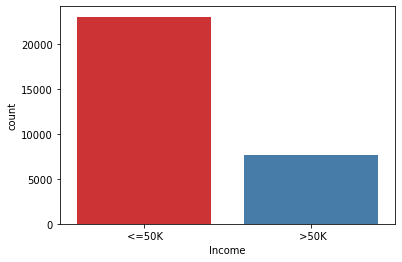

In [62]:
sns.countplot(CNS_DF['Income'],palette="Set1")

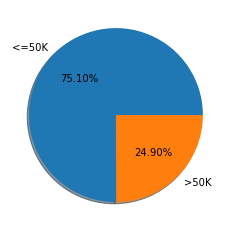

In [63]:
labels = ' <=50K','>50K'
fig,ax = plt.subplots()
ax.pie(CNS_DF['Income'].value_counts(),labels = labels,radius=1,autopct= '%1.2f%%',shadow=True,)
plt.show()

Class :
    
    <=50K has 75.10% of total values
    
    >50K has 24.90% of total values
    
Classes are imbalanced

# Analysing feature columns categorical classes
    

    

In [64]:
CNS_DF.dtypes[CNS_DF.dtypes == 'object'] #Identifying the categorical columns

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [65]:
CNS_DF['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

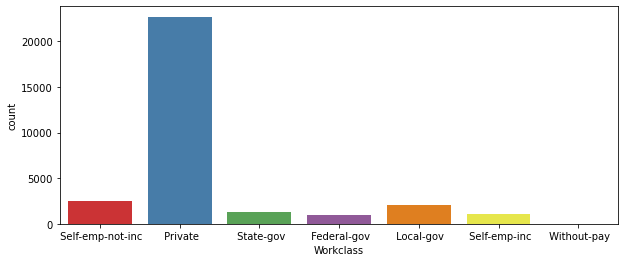

In [66]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(CNS_DF['Workclass'],palette = "Set1")

Majority of peoples are belong to Private workclass.

In [67]:
CNS_DF['Education'].value_counts()

 HS-grad         9968
 Some-college    6775
 Bachelors       5181
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

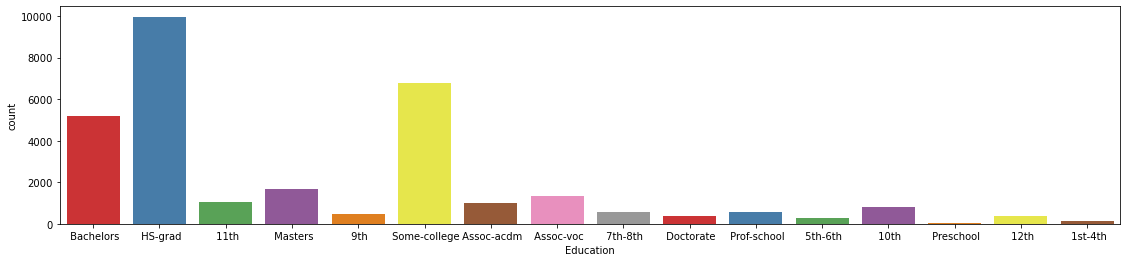

In [70]:
plt.figure(figsize=(19,4),facecolor='white')
sns.countplot(CNS_DF['Education'],palette = "Set1")

Majority of people are HS-grad followed by Bachelors and those having attended some-college.

In [72]:
CNS_DF['Marital_status'].value_counts()

 Married-civ-spouse       14339
 Never-married             9911
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

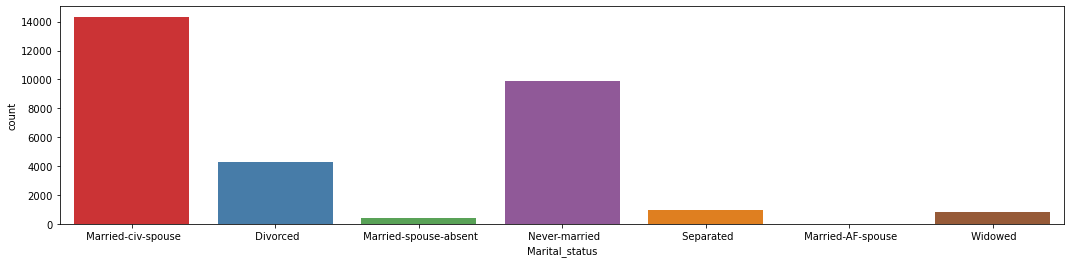

In [74]:
plt.figure(figsize=(18,4),facecolor='white')
sns.countplot(CNS_DF['Marital_status'],palette = "Set1")

Majority of peoples are married followed by those who have never married

In [75]:
CNS_DF['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

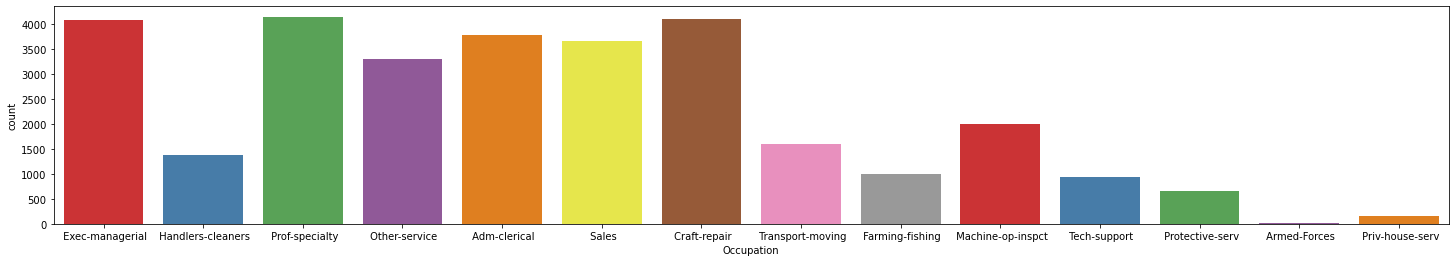

In [76]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(CNS_DF['Occupation'],palette = "Set1")

In [77]:
CNS_DF['Relationship'].value_counts()

 Husband           12704
 Not-in-family      7864
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

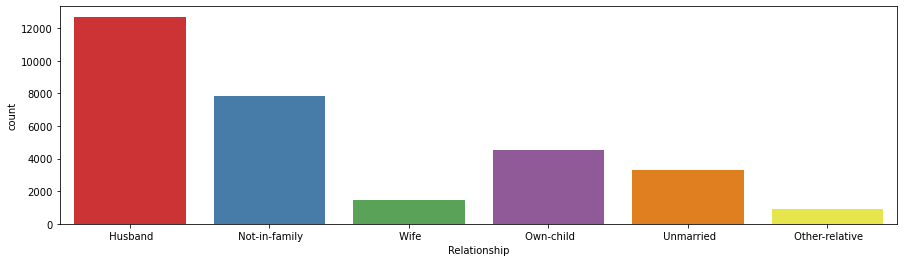

In [78]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(CNS_DF['Relationship'],palette = "Set1")

Husband is most common relationship

In [79]:
CNS_DF['Race'].value_counts()

 White                 26300
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

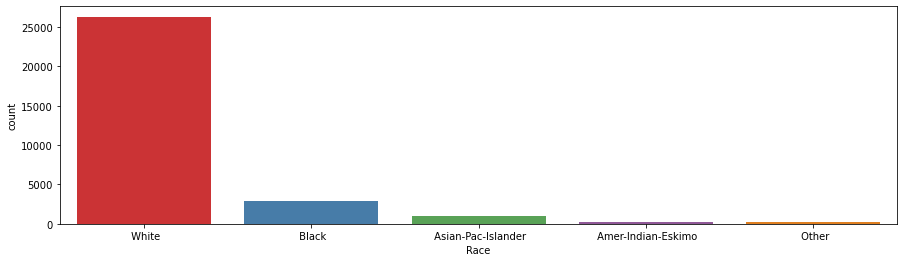

In [80]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(CNS_DF['Race'],palette = "Set1")

White form are majority.

In [81]:
CNS_DF['Sex'].value_counts()

 Male      20787
 Female     9930
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

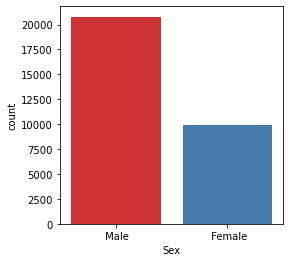

In [82]:
plt.figure(figsize=(4,4),facecolor='white')
sns.countplot(CNS_DF['Sex'],palette = "Set1")

Males outnumbers females

In [83]:
CNS_DF['Native_country'].value_counts()

 United-States                 28059
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

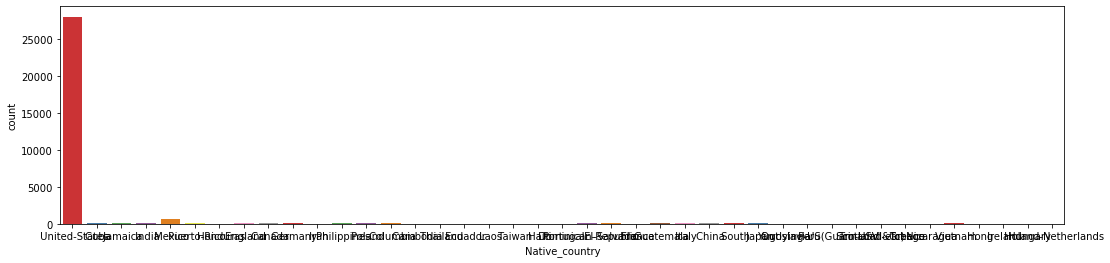

In [84]:
plt.figure(figsize=(18,4),facecolor='white')
sns.countplot(CNS_DF['Native_country'],palette = "Set1")

Majority of peoples are from the United States.

# Analysing feature columns with Continuous_Data

In [85]:
CNS_DF.dtypes[CNS_DF.dtypes !='object'] #Indentefying the continuous/discrete columns

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

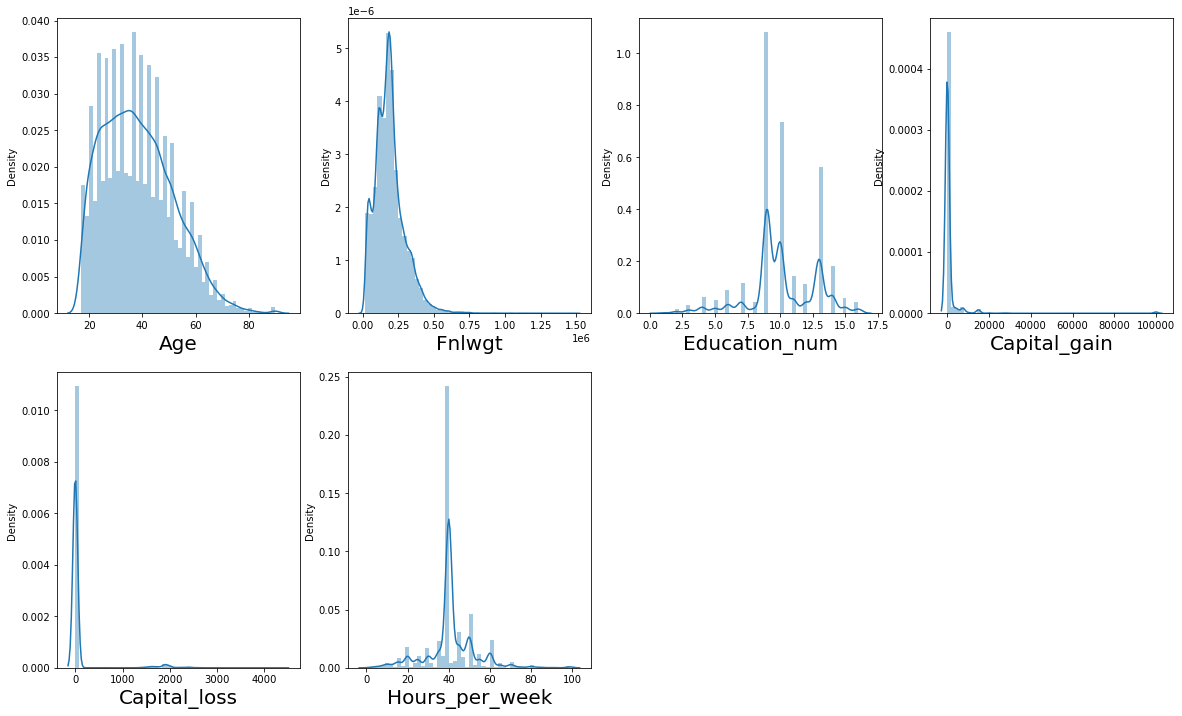

In [88]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in CNS_DF[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(CNS_DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [89]:
CNS_DF[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].skew()

Age                0.531692
Fnlwgt             1.457202
Education_num     -0.310305
Capital_gain      11.785715
Capital_loss       4.514245
Hours_per_week     0.331806
dtype: float64

Fnlwgt,Capital_gain,Capital_loss data distribution are skewed.

# Interpreting relationship between Dependent Variable and Independent ariable.

"Income"  vs Continuous/Discrete data columns

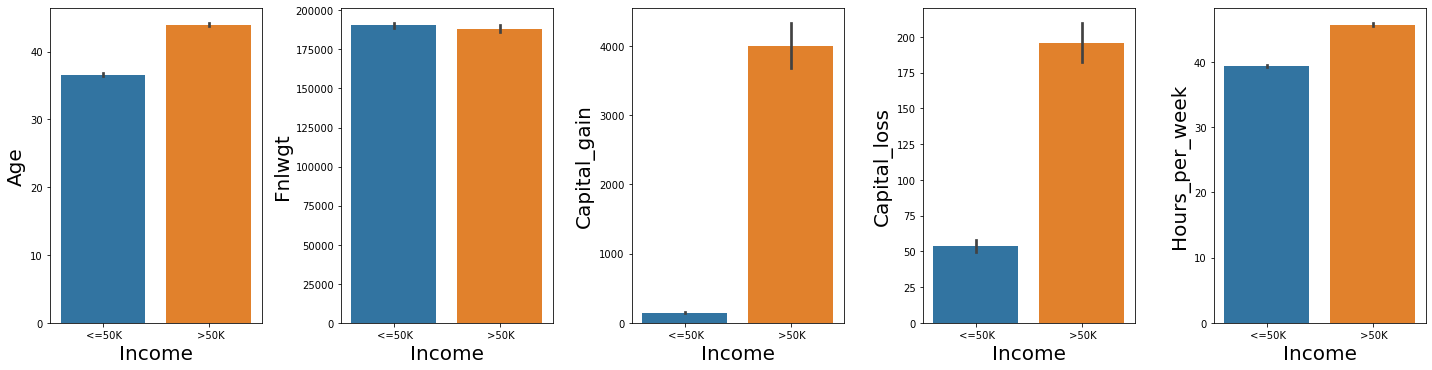

In [91]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = CNS_DF['Income']
X = CNS_DF[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Income',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Majority of people aged 35 and below that is, the younger population earns <=50k.

Fnlwgt dosent seem to impact income much.

Higher Education_num contributes to higher income >50K.

Higher Capital_gain and Higher Capital_loss contribute to higher income >50K.

People who work greater than 40 hours per week earn >50K.

# "Income" vs Categorical Data Columns

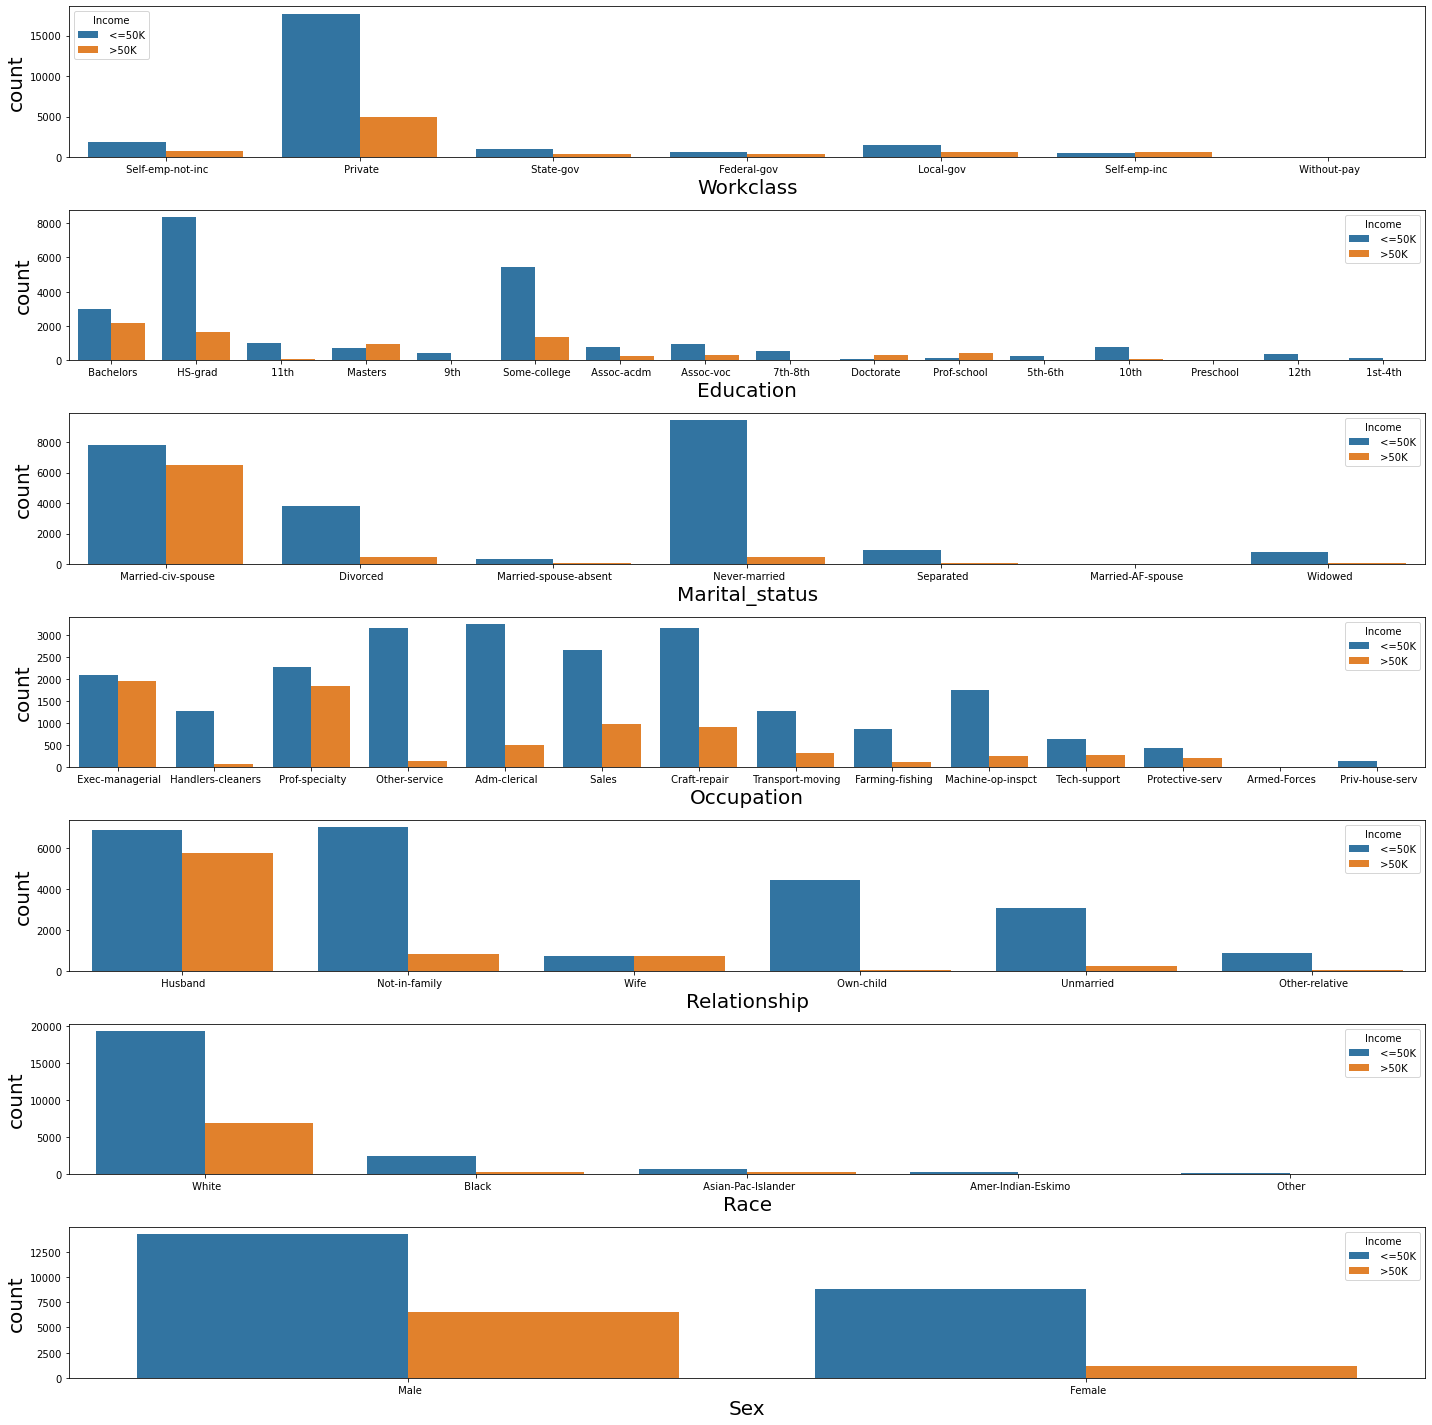

In [92]:
plt.figure (figsize=(20,25),facecolor='white')
plotnum = 1

y = CNS_DF['Income']
x = CNS_DF[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']]

for col in x:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(x[col],hue=y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnum+=1
plt.tight_layout()

<AxesSubplot:xlabel='Native_country', ylabel='count'>

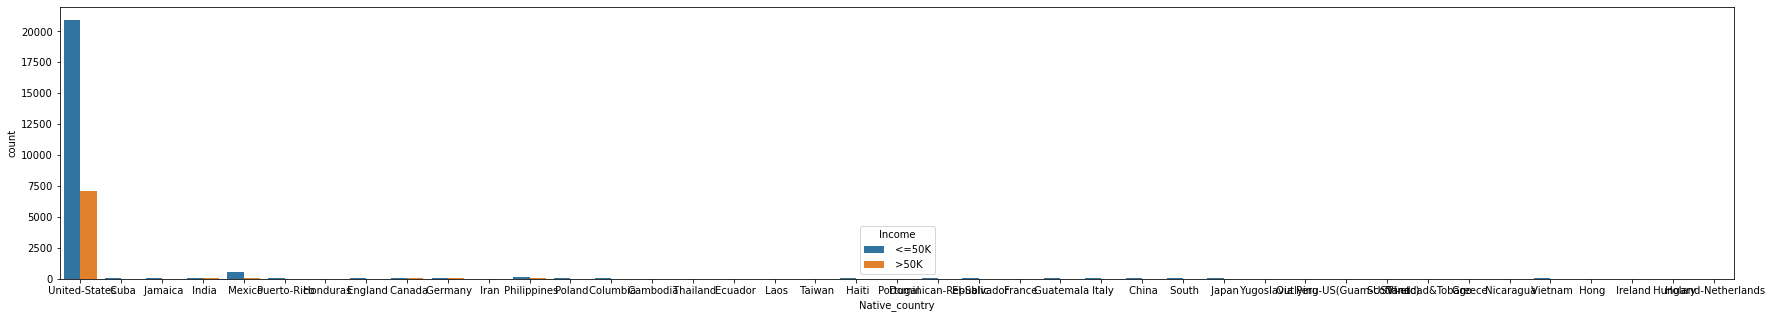

In [93]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(CNS_DF['Native_country'],hue= CNS_DF['Income'])

Following observations can be made from above graphs:

People who belong to private working class make more money than other working groups but are also more likely to earn <=50K.

People with lower education tend to make <=50K, while those with Doctorate, Prof-school, Masters,Bachelors degrees or those who have atleast been to some college are more likely to earn >50K.

Higher Education_num contributes to higher income >50K.

Divorced,Seprated,married but spouse absent,never married,widowed people are most likely to earn <=50K while people who earn >50K are mostly married.

Exce-managerial, Prof-speciality are the highest paying jobs, while craft-repair, transport-movingm Machine-op-inspct, tech-support, private-house service, other services, adm-clerical and sales mostly pay <=50K.

Husbands make the highest amount, while those not in family mostly earn <50K.

Most people who make >50K are white, while most blacks and other minority races earn <=50K.

Males earn more than females on average.

Income data is mostly available only for people, native to United States.

# Checking for outliers in columns with continuous distributions



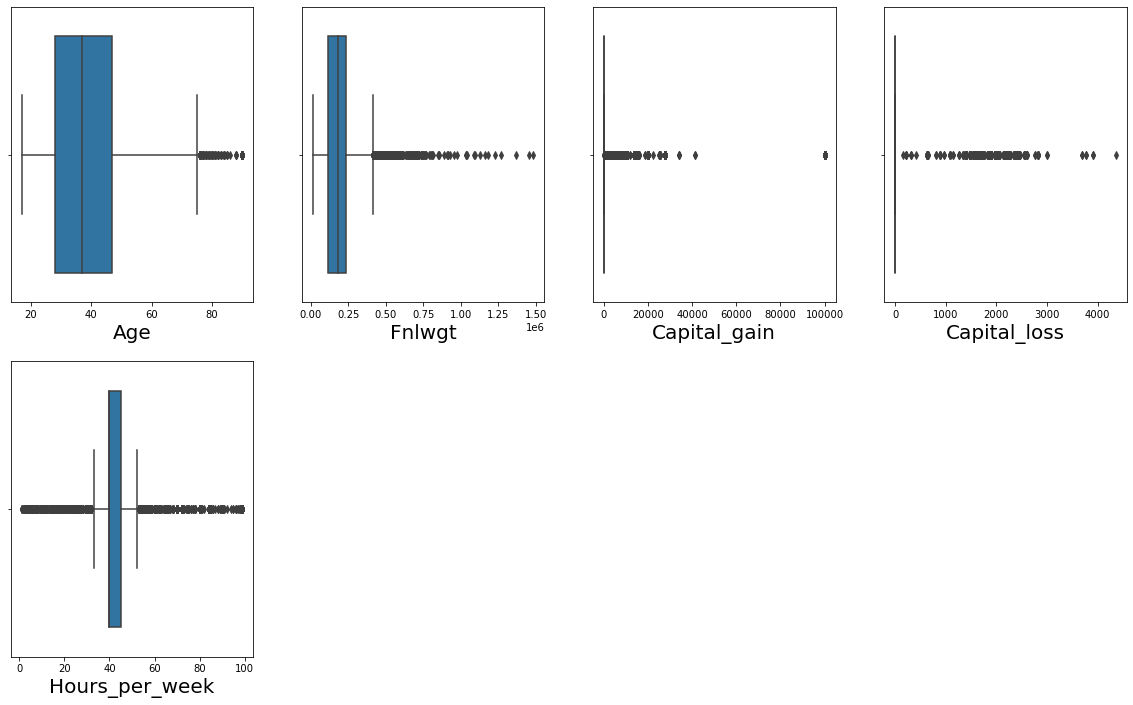

In [94]:
x = CNS_DF.drop(columns=['Income'])
y = CNS_DF['Income']

plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

        

All columns have outliers

# Removing outliers using Z score

In [96]:
df2 = x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()

In [97]:
df2

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


In [98]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs <3).all(axis=1)]  #taking 3 as threshold value.

In [100]:
df3.shape

(28289, 5)

In [101]:
df2.shape

(30717, 5)

# Checking Data loss %

In [102]:
loss = (30717-28289)/30717*100
loss

7.904417749129148

7.90% Data loss is within acceptable range

# Using IQR Method

In [103]:
df = x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()

In [104]:
#find all the indices of outliers in the columns using IQR and append them to indxdrop array

indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)] . index
    indxdrop = np.append(indxdrop, indx)

In [105]:
df = df.drop(indxdrop)

In [106]:
df.shape

(18906, 5)

# Checking Data loss %

In [107]:
loss = (30717-18906)/30717*100
loss

38.4510206074812

38.45% of Data loss is not acceptable

# Using Zscore method to reduce Outliers

In [108]:
dropindx = x.index.difference(df3.index)

In [109]:
CNS_DF.drop(dropindx,inplace = True) # dropping the outliers from original feature DataFrame

In [110]:
CNS_DF.shape

(28289, 15)

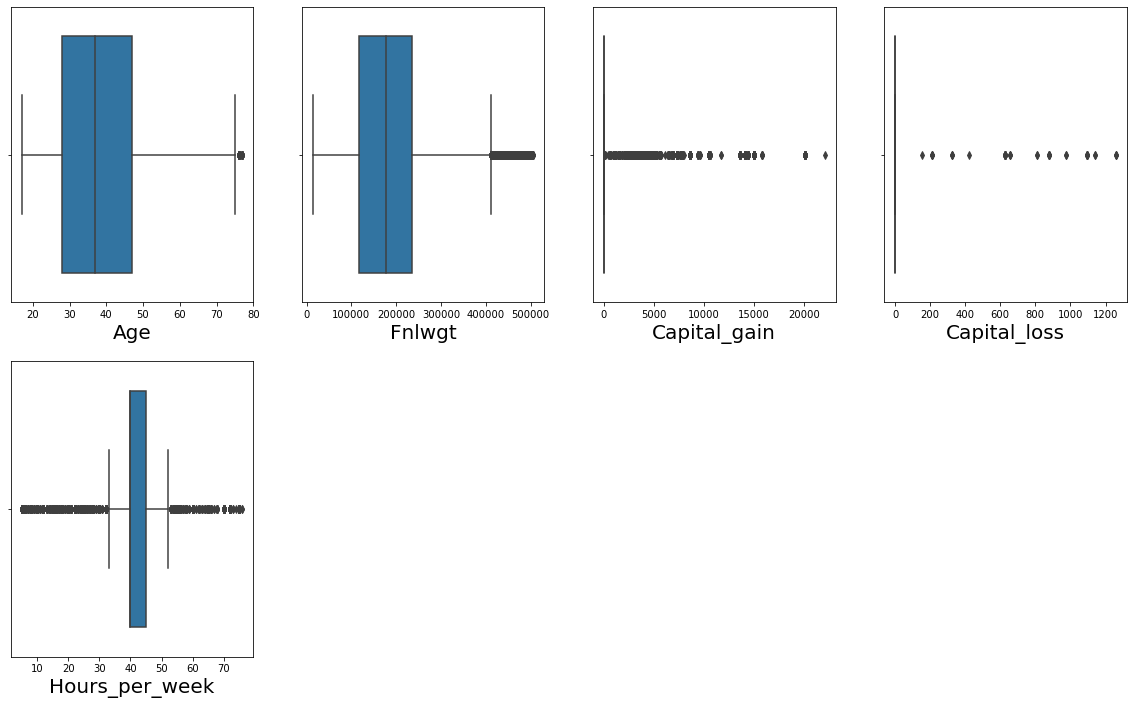

In [111]:
x = CNS_DF.drop(columns = ['Income'])
y = CNS_DF['Income']

plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed

# Checking for Skewness in Data

In [112]:
x.skew()

Age                0.447864
Fnlwgt             0.630039
Education_num     -0.322370
Capital_gain       4.873194
Capital_loss      29.355524
Hours_per_week    -0.278405
dtype: float64

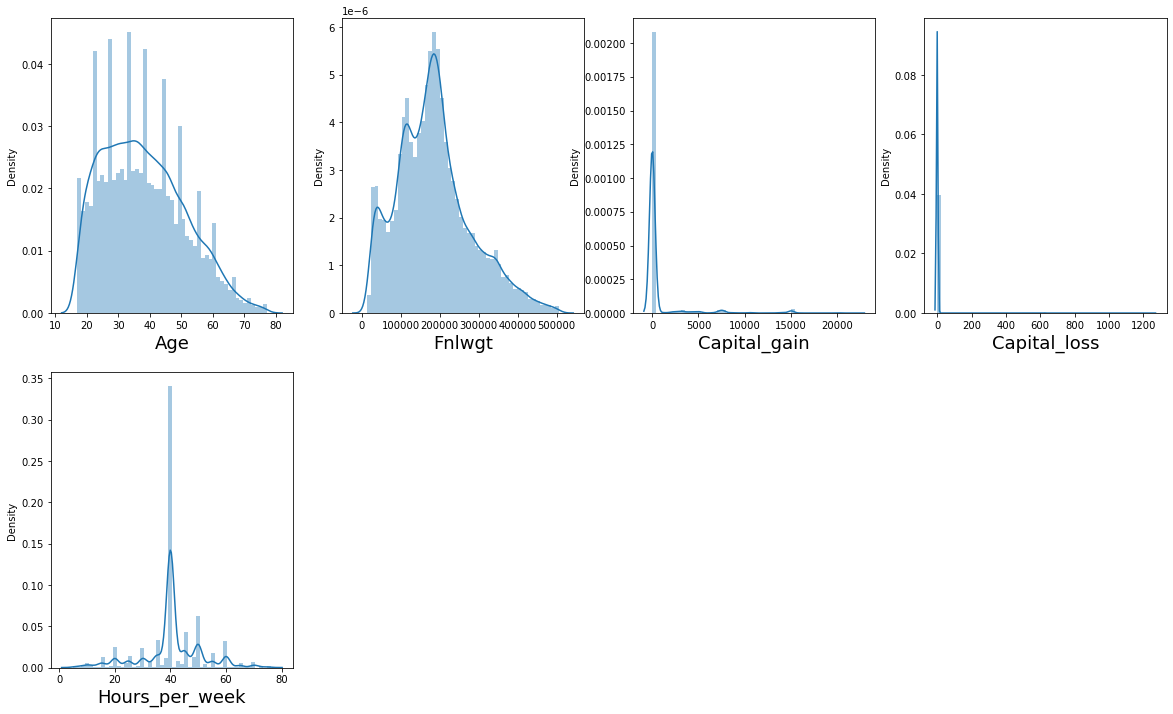

In [114]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=35:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=18)
    plotnum+=1
plt.show()
        

Considerable skewness exists in the data distributions

# Reducing skewness further using Power Transformer

In [115]:
from sklearn.preprocessing import PowerTransformer

In [116]:
powtrns = PowerTransformer(method='yeo-johnson',standardize = True)

In [117]:
df4 = x[['Fnlwgt','Capital_gain','Capital_loss']]

In [118]:
transformed = powtrns.fit_transform(df4)

In [119]:
transformed = pd.DataFrame(transformed,columns = df4.columns) #to convert numpy array back into dataframe

In [120]:
transformed.skew()

Fnlwgt          -0.034745
Capital_gain     3.065023
Capital_loss    24.739539
dtype: float64

In [121]:
transformed.index = CNS_DF.index

In [122]:
CNS_DF[['Fnlwgt','Capital_gain','Capital_loss']] = transformed[['Fnlwgt','Capital_gain','Capital_loss']]

In [123]:
CNS_DF

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,-1.120230,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.297417,-0.040357,13,United-States,<=50K
1,38,Private,0.421868,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.297417,-0.040357,40,United-States,<=50K
2,53,Private,0.602192,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.297417,-0.040357,40,United-States,<=50K
3,28,Private,1.483805,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.297417,-0.040357,40,Cuba,<=50K
4,37,Private,1.044392,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.297417,-0.040357,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,0.807262,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.297417,-0.040357,38,United-States,<=50K
32556,40,Private,-0.213232,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.297417,-0.040357,40,United-States,>50K
32557,58,Private,-0.240977,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.297417,-0.040357,40,United-States,<=50K
32558,22,Private,0.283315,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.297417,-0.040357,20,United-States,<=50K


# Encoding the Categorical Columns 

Encoding using get_dummies()

In [124]:
dumm = pd.get_dummies(CNS_DF[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']],drop_first = False)

In [125]:
dumm.shape

(28289, 57)

In [126]:
CNS_DF = CNS_DF.join(dumm)

In [127]:
CNS_DF.drop(columns = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex'],axis=1,inplace = True)

# Encoding the 'Native_country' column using Label encoder

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
labenc = LabelEncoder()

In [130]:
col = ['Native_country']

In [131]:
CNS_DF[col] = labenc.fit_transform(CNS_DF[col])

# Encoding the Label Column

In [132]:
CNS_DF['Income'] = CNS_DF.Income.map({' <=50K':0, ' >50K':1})

In [133]:
CNS_DF

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,-1.120230,13,-0.297417,-0.040357,13,37,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,0.421868,9,-0.297417,-0.040357,40,37,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,0.602192,7,-0.297417,-0.040357,40,37,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,1.483805,13,-0.297417,-0.040357,40,4,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,37,1.044392,14,-0.297417,-0.040357,40,37,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.807262,12,-0.297417,-0.040357,38,37,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32556,40,-0.213232,9,-0.297417,-0.040357,40,37,1,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,58,-0.240977,9,-0.297417,-0.040357,40,37,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32558,22,0.283315,9,-0.297417,-0.040357,20,37,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# Finding Correlation

In [134]:
CNS_corr = CNS_DF.corr()
CNS_corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
Age,1.000000,-0.067349,0.035694,0.115543,0.019815,0.119329,-0.003840,0.244073,0.062534,0.071873,...,-0.427948,0.055981,0.027685,-0.009866,-0.011633,-0.010437,-0.032268,0.025574,-0.078207,0.078207
Fnlwgt,-0.067349,1.000000,-0.043976,-0.006192,-0.002969,-0.021939,-0.070561,-0.008234,-0.019830,-0.000841,...,0.017868,-0.000839,-0.019614,-0.076166,-0.047925,0.102972,0.014299,-0.044555,-0.025141,0.025141
Education_num,0.035694,-0.043976,1.000000,0.108724,0.007557,0.151815,0.095891,0.316793,0.060200,0.100146,...,-0.090457,-0.055621,0.028943,-0.028378,0.061778,-0.071851,-0.049392,0.049902,-0.000527,0.000527
Capital_gain,0.115543,-0.006192,0.108724,1.000000,-0.012003,0.077193,0.010871,0.263477,0.012826,0.013400,...,-0.083511,-0.039138,0.036353,-0.000353,-0.003325,-0.028497,-0.014478,0.029259,-0.065636,0.065636
Capital_loss,0.019815,-0.002969,0.007557,-0.012003,1.000000,-0.001896,0.003143,-0.017852,0.002846,0.013535,...,-0.012261,0.069770,-0.004693,-0.003991,0.002759,0.001872,0.005944,-0.003357,0.036825,-0.036825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Race_ Black,-0.010437,0.102972,-0.071851,-0.028497,0.001872,-0.060615,0.018952,-0.088072,0.048534,0.039067,...,0.015080,0.151520,0.001096,-0.032059,-0.058492,1.000000,-0.029732,-0.788275,0.119207,-0.119207
Race_ Other,-0.032268,0.014299,-0.049392,-0.014478,0.005944,-0.008793,-0.115216,-0.031571,-0.000819,-0.010833,...,-0.005462,0.012335,0.000210,-0.009071,-0.016550,-0.029732,1.000000,-0.223038,0.010567,-0.010567
Race_ White,0.025574,-0.044555,0.049902,0.029259,-0.003357,0.057591,0.111878,0.084858,-0.051015,-0.026543,...,-0.013359,-0.131242,-0.010651,-0.240488,-0.438777,-0.788275,-0.223038,1.000000,-0.106122,0.106122
Sex_ Female,-0.078207,-0.025141,-0.000527,-0.065636,0.036825,-0.235231,-0.000901,-0.209708,0.001902,0.041843,...,0.100161,0.327862,0.311671,0.009359,0.002760,0.119207,0.010567,-0.106122,1.000000,-1.000000


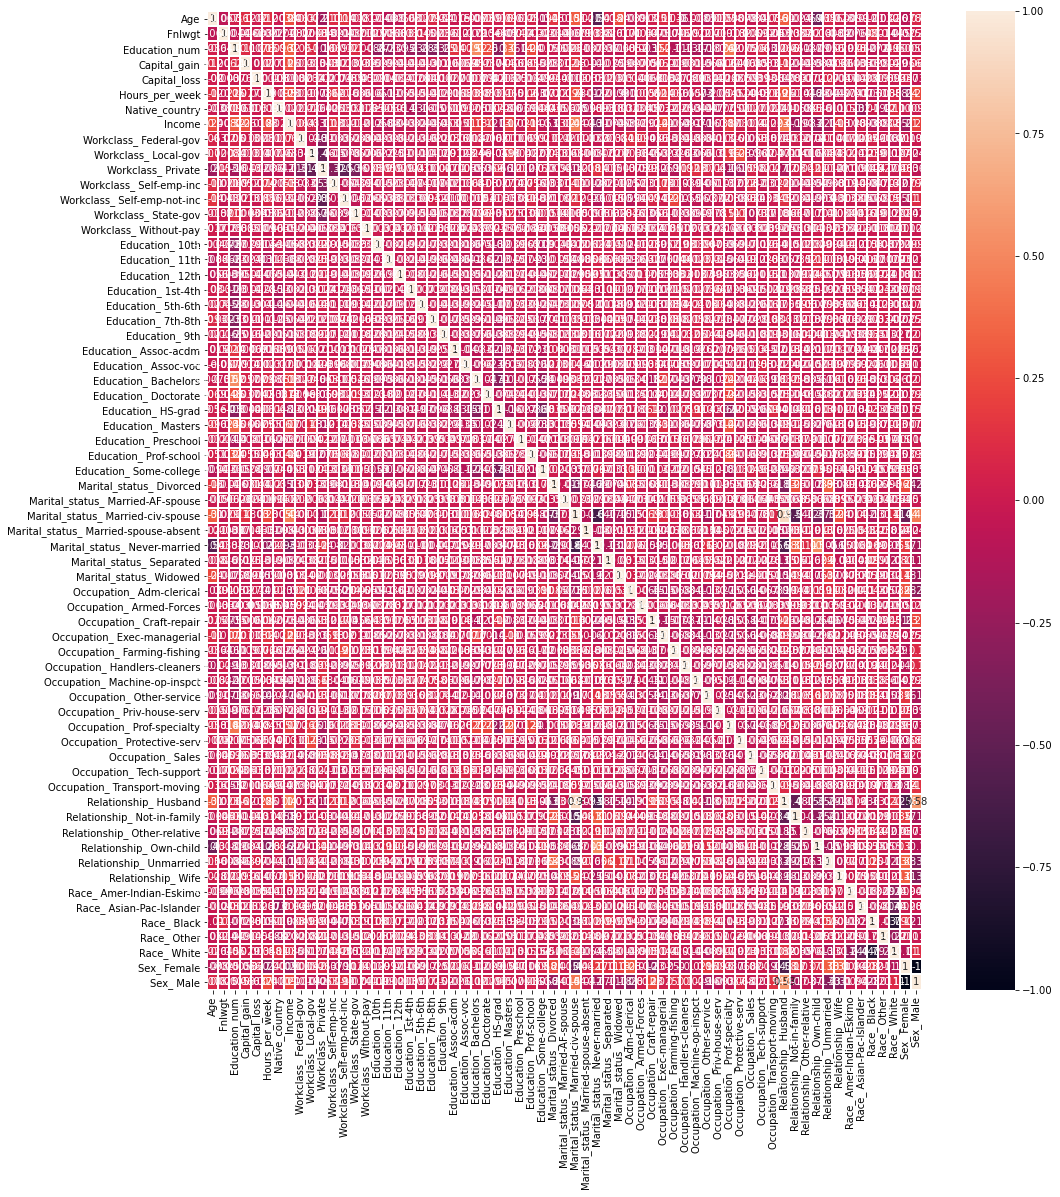

In [135]:
plt.figure(figsize=(16,18))
sns.heatmap(CNS_corr,annot=True,linewidth=1)
plt.show()

# Visualising correlation of feature columns with label column.

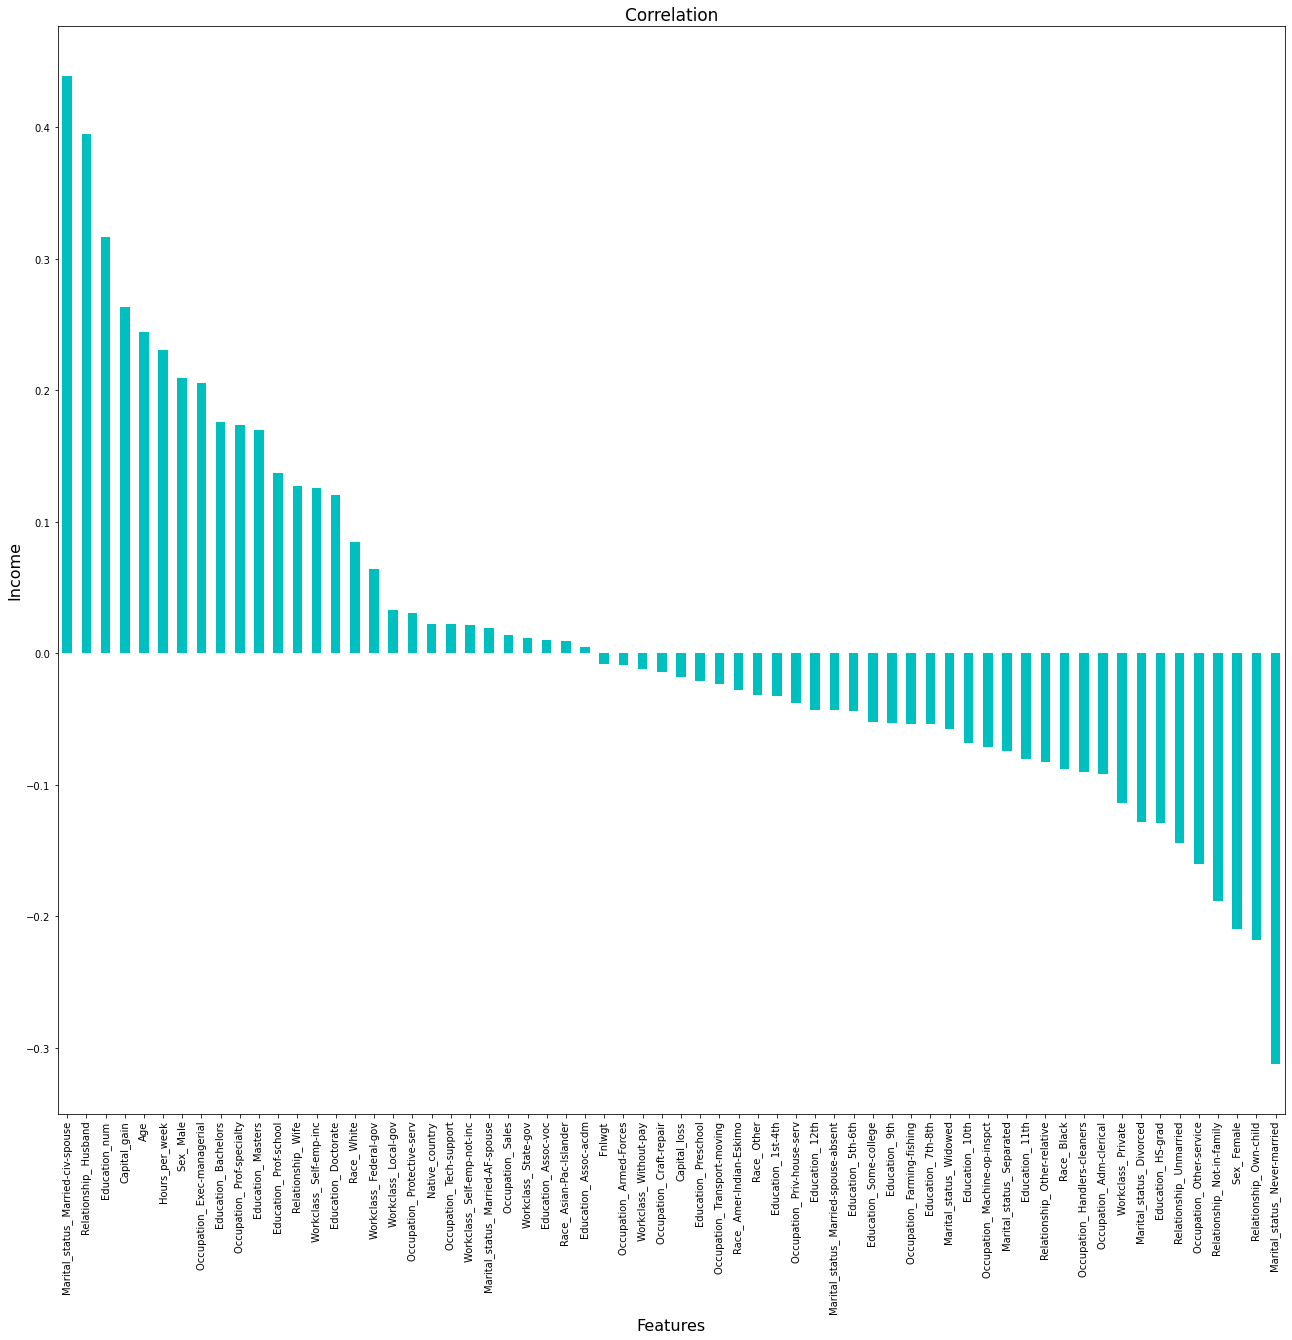

In [136]:
plt.figure(figsize=(22,20))
CNS_DF.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind = 'bar',color = 'c')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Income',fontsize=16)
plt.title('Correlation',fontsize=17)
plt.show()

Marital_status Married-civ-spouse,Relationship_Husband,Education_num,Capital_gain,Age,Hours_per_week,Sex_Male,Occupation_Exec-manegerial,Education_Bachelors,Occupation_Prof-speciality,Education_Masters,EducationProf-school,Relationship_Wife,Workclass_Self-emp-inc,Education_Doctorate,Race_white have the highest positive correlation with Income.

while Marital_status_Never-Married,Relationship_Own_child,Sex_Female,Relationship_Not-In-Family,Occupation_Other-service,Relationship_Unmarried,Education_HS-grad,Marital_status_Divorced,Workclas_Private,Occupation_adm-clerical,Race_Black, have the highest negative correlation.

Native_country,Occupation_Tech-support,fnlwgt etc have the lowest correlation with Income.

In [137]:
x = CNS_DF.drop(columns = ['Income'])
y = CNS_DF['Income']

# Feature Selection

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Checking for multicollinearity using Variance Inflation Factor

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif = pd.DataFrame()

In [142]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [143]:
vif.head(10)

,Features,vif
0,Age,1.691254
1,Fnlwgt,1.041587
2,Education_num,inf
3,Capital_gain,1.041346
4,Capital_loss,1.007280
5,Hours_per_week,1.243768
6,Native_country,1.147633
7,Workclass_ Federal-gov,inf
8,Workclass_ Local-gov,inf
9,Workclass_ Private,inf


There are no multicollinearity

# Principle components analysis

In [144]:
from sklearn.decomposition import PCA

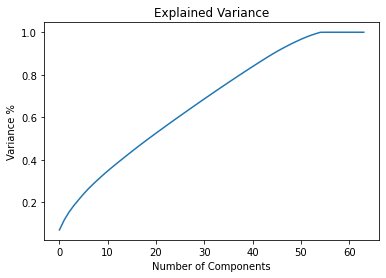

In [146]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

50 components explain around 95% of variance in data

# Slecting KBest features

In [147]:
from sklearn.feature_selection import SelectKBest, f_classif

In [148]:
bestfeat = SelectKBest(score_func = f_classif, k=64)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [149]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(64,'Score'))

                               Feature        Score
32  Marital_status_ Married-civ-spouse  6761.131394
51               Relationship_ Husband  5230.098063
2                        Education_num  3155.503874
34       Marital_status_ Never-married  3062.006688
3                         Capital_gain  2110.175393
..                                 ...          ...
22                Education_ Assoc-voc     3.038378
58            Race_ Asian-Pac-Islander     2.437602
38            Occupation_ Armed-Forces     2.383420
1                               Fnlwgt     1.917792
21               Education_ Assoc-acdm     0.703986

[64 rows x 2 columns]


In [151]:
x_best = x.drop(columns=['Race_ Asian-Pac-Islander','Fnlwgt','Education_ Assoc-acdm','Native_country','Occupation_ Tech-support','Workclass_ Self-emp-not-inc','Education_ Preschool','Marital_status_ Married-AF-spouse','Capital_loss','Occupation_ Craft-repair','Education_ Assoc-voc','Workclass_ State-gov','Workclass_ Without-pay','Occupation_ Sales']).copy()

In [152]:
scaled_x_best = scaler.fit_transform(x_best)

This is a classification problem since target/label column (Income) has categorical data type.

# Classification Model Building

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Balancing out classes in label column 'Income' using SMOTE Technique

In [154]:
from imblearn.over_sampling import SMOTE as sm

In [155]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel())

# Finding the best random state

In [157]:
from sklearn.linear_model import LogisticRegression

maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size=.31,random_state=i)
    modLR = LogisticRegression()
    modLR.fit(x_train,y_train)
    pred = modLR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print(f"Best Accuracy is : {maxAcc} on Random_State : {maxRS}")

Best Accuracy is : 0.826489086200518 on Random_State : 86


In [158]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size=.31,random_state = 86)

In [159]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [160]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [161]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

# Training the models

In [162]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
adbc.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

[12:41:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

All models have been trained

# Logistic Regression model accuracy

In [163]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [164]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[5292, 1427],
       [ 920, 5876]], dtype=int64)

In [165]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6719
           1       0.80      0.86      0.83      6796

    accuracy                           0.83     13515
   macro avg       0.83      0.83      0.83     13515
weighted avg       0.83      0.83      0.83     13515



# Random Forest Classifier Model

In [166]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [167]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[5817,  902],
       [ 702, 6094]], dtype=int64)

In [168]:
print(accu)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6719
           1       0.87      0.90      0.88      6796

    accuracy                           0.88     13515
   macro avg       0.88      0.88      0.88     13515
weighted avg       0.88      0.88      0.88     13515



# XGB Classifier Model

In [169]:
XGBpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBpred)

conf_matrx = confusion_matrix(y_test,XGBpred)
conf_matrx


array([[6001,  718],
       [ 550, 6246]], dtype=int64)

In [170]:
print(accu)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      6719
           1       0.90      0.92      0.91      6796

    accuracy                           0.91     13515
   macro avg       0.91      0.91      0.91     13515
weighted avg       0.91      0.91      0.91     13515



# AdaBoost Classifier Model

In [171]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[5465, 1254],
       [ 822, 5974]], dtype=int64)

In [172]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6719
           1       0.83      0.88      0.85      6796

    accuracy                           0.85     13515
   macro avg       0.85      0.85      0.85     13515
weighted avg       0.85      0.85      0.85     13515



# SV Classifier Model

In [173]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)

conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[5237, 1482],
       [ 709, 6087]], dtype=int64)

In [174]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      6719
           1       0.80      0.90      0.85      6796

    accuracy                           0.84     13515
   macro avg       0.84      0.84      0.84     13515
weighted avg       0.84      0.84      0.84     13515



# K Nearest Neighbours Classifier Model

In [175]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[5290, 1429],
       [ 707, 6089]], dtype=int64)

In [176]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6719
           1       0.81      0.90      0.85      6796

    accuracy                           0.84     13515
   macro avg       0.85      0.84      0.84     13515
weighted avg       0.85      0.84      0.84     13515



# Model Cross Validation

In [178]:
from sklearn.model_selection import cross_val_score as cvs

Logistic Regression

In [179]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean())

0.8181860285084079


Random Forest Classifier

In [180]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.8776212863185906


XGB Classifier

In [181]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

[12:57:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

AdaBoost Classifier

In [182]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.843694256511997


SV Classifier

In [183]:
print(cvs(SV,smt_x,smt_y,cv=5).mean())

0.8343580445897123


K Nearest Neighbors Classifier

In [184]:
print(cvs(KNN,smt_x,smt_y,cv=5).mean())

0.84536880519851


# ROC AUC Scores

Logistic Regression

In [185]:
roc_auc_score(y_test,LOGRpred)

0.826121727838469

SV Classifier

In [186]:
roc_auc_score(y_test,SVpred)

0.8375526944270292

AdaBoost Classifier

In [187]:
roc_auc_score(y_test,adbcpred)

0.8462057910149294

XGB Classifier

In [189]:
roc_auc_score(y_test,XGBpred)

0.9061044505750518

Random Forest Classifier

In [190]:
roc_auc_score(y_test,RFCpred)

0.8812288879558562

K Nearest Neighbors Classifier

In [192]:
roc_auc_score(y_test,KNNpred)

0.8416438790982256

# ROC AUC Curves

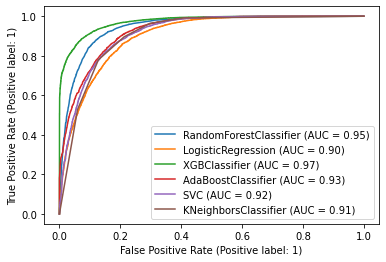

In [193]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,adbc,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax = disp.ax_)
    plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on above graph and roc_auc_scores, XGB Classifier is the best model for the dataset, with AUC = 0.97 and roc_auc_score = 0.90

# Hyper Parameter Tunning

XGB Classifier

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
parameter = {'booster':["gbtree","gblinear"],'eta':[0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [196]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs=-1,verbose=1)

In [197]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[16:25:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [198]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'max_depth': 20,
 'min_child_weight': 4,
 'subsample': 1}

In [199]:
Best_mod = XGBClassifier(booster = 'gbtree',eta=0.2, max_depth = 20, min_child_weight=4,subsample=1)
Best_mod.fit(x_train,y_train)

[17:19:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=20, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
xgbpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

90.46244913059563


In [201]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[6006,  713],
       [ 576, 6220]], dtype=int64)

XGBClassifier has an accuracy of 90.46%

# Saving the model

In [202]:
import joblib
joblib.dump(Best_mod,"BestModelCencus.pkl")

['BestModelCencus.pkl']

# Loading the model

In [203]:
mod = joblib.load("BestModelCencus.pkl")

In [204]:
print(mod.predict(x_test))

[0 0 1 ... 1 1 0]


In [205]:
Prediction_accuracy = pd.DataFrame({'Prediction':mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Prediction,Actual Values
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,1
7,1,1
8,0,0
9,0,0
